<a href="https://colab.research.google.com/github/J-R1v3r/python-data-science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
import matplotlib.pyplot as plt

Ingreso total de la Tienda 1: $1,150,880,400
Ingreso total de la Tienda 2: $1,116,343,500
Ingreso total de la Tienda 3: $1,098,019,600
Ingreso total de la Tienda 4: $1,038,375,700


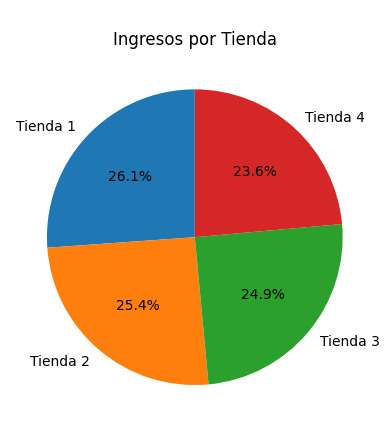

In [28]:
'''Ingreso total de cada tienda.'''

# Diccionario de tiendas
tiendas = {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

# Bucle 'for' que recorre la columna 'precio' y retorna su suma para cada tienda
for nombre, datos in tiendas.items():
  ingreso_total = datos['Precio'].sum()
  print(f"Ingreso total de la {nombre}: ${ingreso_total:,.0f}")
valores = [datos['Precio'].sum() for datos in tiendas.values()]

# Gŕafico de Torta
plt.pie(valores, labels=tiendas.keys(), autopct='%.1f%%', startangle=90)
plt.title('\nIngresos por Tienda')
plt.show()

# 2. Ventas por categoría

Productos vendidos por categoría en la Tienda 1:
    Categoría del Producto  Cantidad Vendida
1  Artículos para el hogar               171
2     Deportes y diversión               284
3        Electrodomésticos               312
4             Electrónicos               448
5   Instrumentos musicales               182
6                 Juguetes               324
7                   Libros               173
8                  Muebles               465


Productos vendidos por categoría en la Tienda 2:
    Categoría del Producto  Cantidad Vendida
1  Artículos para el hogar               181
2     Deportes y diversión               275
3        Electrodomésticos               305
4             Electrónicos               422
5   Instrumentos musicales               224
6                 Juguetes               313
7                   Libros               197
8                  Muebles               442


Productos vendidos por categoría en la Tienda 3:
    Categoría del Producto  Cantidad Ve

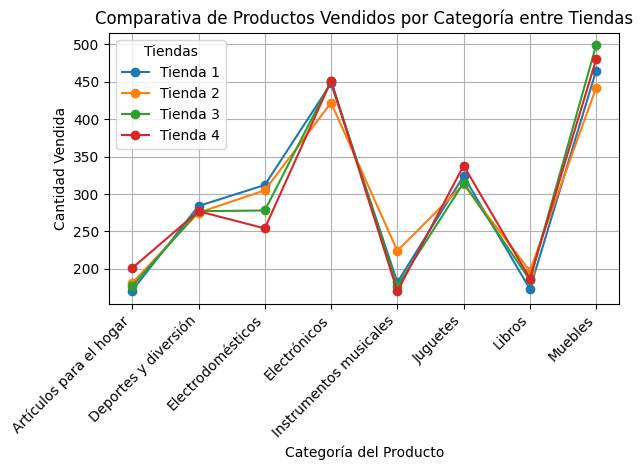

In [11]:
'''Cantidad de productos vendidos por categoría en cada tienda.'''

# Bucle 'for' que recorre las columnas 'Categoría del Producto' y 'Producto' y retorna la cantidad vendida por categoría de cada tienda
for nombre, datos in tiendas.items():
  ventas_por_categoria = datos.groupby(['Categoría del Producto'])['Producto'].count().reset_index()
  ventas_por_categoria = ventas_por_categoria.rename(columns={'Producto': 'Cantidad Vendida'})
  ventas_por_categoria.index = ventas_por_categoria.index + 1
  print(f"Productos vendidos por categoría en la {nombre}:", ventas_por_categoria, '\n', sep='\n')
  plt.plot(ventas_por_categoria['Categoría del Producto'], ventas_por_categoria['Cantidad Vendida'], marker='o', linestyle='-', label=nombre)

# Gráfico de Líneas
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad Vendida")
plt.title("Comparativa de Productos Vendidos por Categoría entre Tiendas")
plt.legend(title="Tiendas")
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


Calificación promedio de la Tienda 1: 3.98
Calificación promedio de la Tienda 2: 4.04
Calificación promedio de la Tienda 3: 4.05
Calificación promedio de la Tienda 4: 4.00


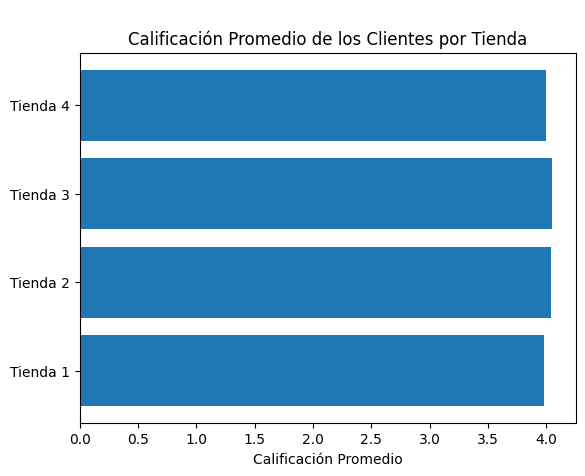

In [32]:
'''Calificación Promedio de los Clientes para cada Tienda'''

# Bucle 'for' que recorre la columna 'Calificación' y retorna el promedio de la calificación dada por el cliente para cada tienda
for nombre, datos in tiendas.items():
    calificacion_promedio = datos['Calificación'].mean()
    print(f"Calificación promedio de la {nombre}: {calificacion_promedio:.2f}")
valores = [datos['Calificación'].mean() for datos in tiendas.values()]

# Gŕafico de Torta
plt.barh(tiendas.keys(), valores)
plt.title('\nCalificación Promedio de los Clientes por Tienda')
plt.xlabel('Calificación Promedio')
plt.show()

# 4. Productos más y menos vendidos


Tienda 1:
                       Producto  Cantidad Vendida
1                    Microondas                60
2                 TV LED UHD 4K                60
3                       Armario                60
4              Secadora de ropa                58
5                 Mesa de noche                56
6       Bloques de construcción                56
7           Balón de baloncesto                55
8                     Bicicleta                54
9                  Vaso térmico                54
10                 Refrigerador                54
11                    Impresora                54
12                      Batería                53
13                   Cubertería                52
14    Carrito de control remoto                52
15          Modelado predictivo                51
16                  Auriculares                50
17            Ajedrez de madera                49
18                    Iphone 15                49
19                 Lavavajillas        

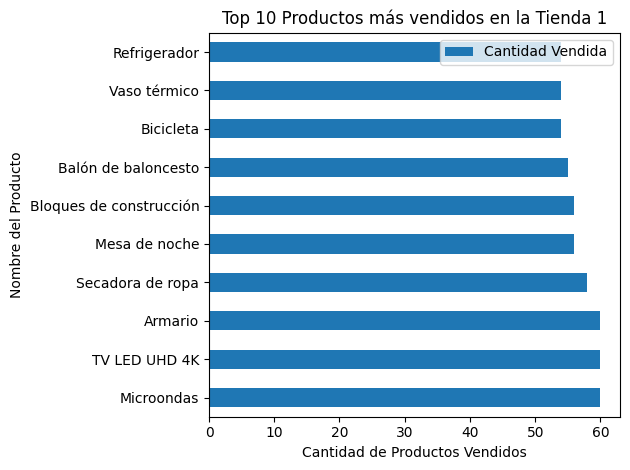


Tienda 2:
                       Producto  Cantidad Vendida
1     Iniciando en programación                65
2                    Microondas                62
3                       Batería                61
4             Guitarra acústica                58
5                     Pandereta                58
6              Secadora de ropa                57
7                     Iphone 15                55
8       Bloques de construcción                54
9                       Armario                54
10                 Set de ollas                52
11           Cuerda para saltar                50
12             Lavadora de ropa                49
13             Silla de oficina                49
14                 Refrigerador                49
15                  Muñeca bebé                48
16    Carrito de control remoto                47
17           Guitarra eléctrica                47
18                     Cama box                47
19                 Vaso térmico        

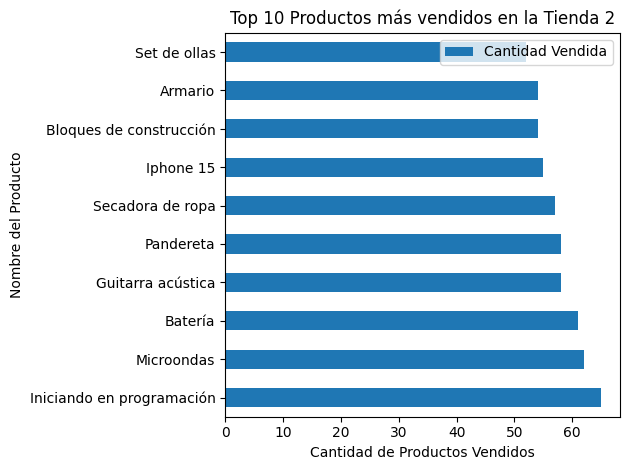


Tienda 3:
                       Producto  Cantidad Vendida
1                 Kit de bancas                57
2               Mesa de comedor                56
3                     Cama king                56
4                  Set de ollas                55
5                 Mesa de noche                55
6                      Smart TV                54
7                        Estufa                53
8            Cuerda para saltar                53
9           Modelado predictivo                53
10    Carrito de control remoto                52
11                 Lavavajillas                52
12                    Bicicleta                52
13                Juego de mesa                52
14                    Pandereta                51
15                    Impresora                50
16                 Refrigerador                50
17          Balón de baloncesto                50
18                      Armario                49
19            Balón de voleibol        

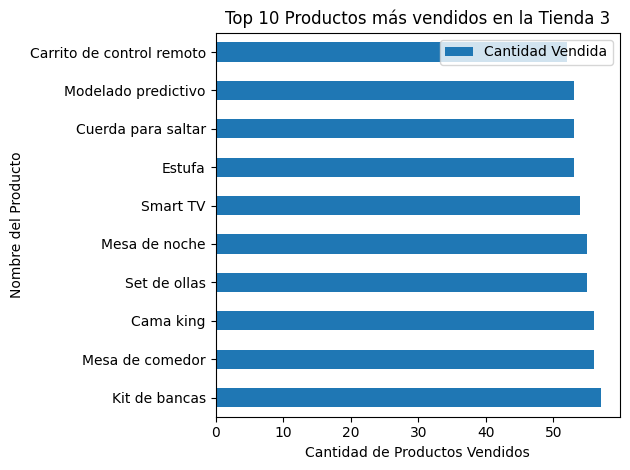


Tienda 4:
                       Producto  Cantidad Vendida
1                      Cama box                62
2                    Cubertería                59
3       Dashboards con Power BI                56
4                     Cama king                56
5     Carrito de control remoto                55
6               Mesa de comedor                55
7                 Mesa de noche                55
8                      Smart TV                54
9       Bloques de construcción                54
10                    Pandereta                52
11                    Impresora                50
12          Modelado predictivo                50
13            Asistente virtual                50
14                 Set de ollas                50
15          Balón de baloncesto                50
16                 Vaso térmico                48
17                    Iphone 15                48
18                  Muñeca bebé                48
19                      Batería        

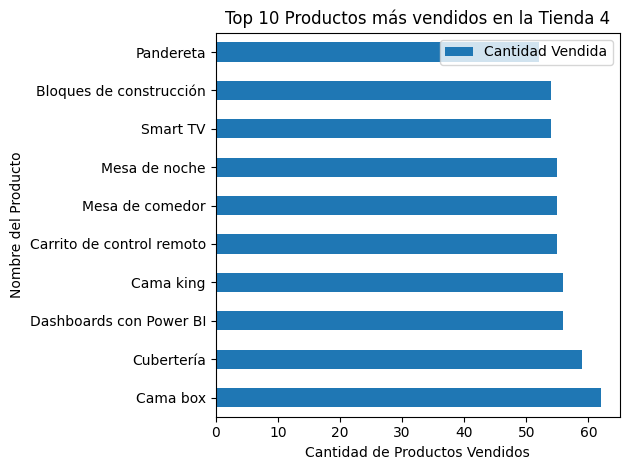

In [44]:
'''Producto más vendidos y menos vendidos de cada Tienda.'''

# Bucle 'for' que recorre la columna 'Producto', retorna la cantidad de veces que se vendió un producto, el producto más y menos vendido para cada tienda
for nombre, datos in tiendas.items():
  conteo_productos = datos['Producto'].value_counts().reset_index()
  conteo_productos.columns = ['Producto', 'Cantidad Vendida']
  conteo_productos.index = conteo_productos.index + 1
  print(f"\n{nombre}:", conteo_productos, sep='\n')

  mas_vendido = conteo_productos.iloc[0]['Producto']
  cantidad_mas_vendido = conteo_productos.iloc[0]['Cantidad Vendida']
  menos_vendido = conteo_productos.iloc[-1]['Producto']
  cantidad_menos_vendido = conteo_productos.iloc[-1]['Cantidad Vendida']

  print(f"\nProducto más vendido: {mas_vendido} (vendido {cantidad_mas_vendido} veces)",
        f"Producto menos vendido: {menos_vendido} (vendido {cantidad_menos_vendido} veces)", sep='\n')

  # Gráfico de barras
  fig, ax = plt.subplots()
  conteo_productos.head(10).plot(x='Producto', y='Cantidad Vendida', kind='barh', ax=ax)
  ax.set_title(f"Top 10 Productos más vendidos en la {nombre}")
  ax.set_xlabel("Cantidad de Productos Vendidos")
  ax.set_ylabel("Nombre del Producto")
  plt.tight_layout()
  plt.show()

# 5. Envío promedio por tienda

In [21]:
'''Costo de Envío Promedio para cada Tienda'''

# Bucle 'for' que recorre la columna 'Costo de envío' y retorna el promedio del costo de envío para cada tienda
for nombre, datos in tiendas.items():
    costo_envio_promedio = datos['Costo de envío'].mean()
    print(f"Costo de Envío Promedio de la {nombre}: ${costo_envio_promedio:,.2f}")

Costo de Envío Promedio de la Tienda 1: $26,018.61
Costo de Envío Promedio de la Tienda 2: $25,216.24
Costo de Envío Promedio de la Tienda 3: $24,805.68
Costo de Envío Promedio de la Tienda 4: $23,459.46
